In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#导入数据
data = pd.read_csv('wine-reviews/winemag-data_first150k.csv')
print('数据行数:'+str(data.shape[0]))
print('数据列数:'+str(data.shape[1]))
print("每个变量数据类型:")
print(data.dtypes)
print("数据前五行:")
data.head()

数据行数:150930
数据列数:11
每个变量数据类型:
Unnamed: 0       int64
country         object
description     object
designation     object
points           int64
price          float64
province        object
region_1        object
region_2        object
variety         object
winery          object
dtype: object
数据前五行:


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [3]:
##数据摘要
##标称属性：country;designation;province;region_1;region_2;variety;winery
features_n = ['country','designation','province','region_1','region_2','variety','winery']
print('标称属性有：'+str(features_n))
print('(每种属性展示其频数最高前十种聚会)')
for fea in features_n: 
    fea_value = data[fea].value_counts()
    print(fea+": 共有"+str(len(fea_value))+"种聚会")
    print(""+str(fea_value[0:10]))

标称属性有：['country', 'designation', 'province', 'region_1', 'region_2', 'variety', 'winery']
(每种属性展示其频数最高前十种聚会)
country: 共有48种聚会
US             62397
Italy          23478
France         21098
Spain           8268
Chile           5816
Argentina       5631
Portugal        5322
Australia       4957
New Zealand     3320
Austria         3057
Name: country, dtype: int64
designation: 共有30621种聚会
Reserve           2752
Reserva           1810
Estate            1571
Barrel sample     1326
Riserva            754
Barrel Sample      639
Brut               624
Crianza            503
Estate Grown       449
Estate Bottled     396
Name: designation, dtype: int64
province: 共有455种聚会
California          44508
Washington           9750
Tuscany              7281
Bordeaux             6111
Northern Spain       4892
Mendoza Province     4742
Oregon               4589
Burgundy             4308
Piedmont             4093
Veneto               3962
Name: province, dtype: int64
region_1: 共有1236种聚会
Napa Valley           

In [4]:
##数值属性：'points','price'
features = ['points','price']
print('数值属性有：'+str(features))
for fea in features: 
    fea_np = np.array(data[fea].dropna(axis=0))
    Minimum=min(fea_np)
    Maximum=max(fea_np)
    Q1=np.percentile(fea_np,25)
    Median=np.median(fea_np)
    Q3=np.percentile(fea_np,75)
    print(fea+"五数概括：最小值：{}，第一四分位数：{}，中位数：{}，第三四分位数：{}，最大值{}".format(Minimum,Q1,Median,Q3,Maximum))

数值属性有：['points', 'price']
points五数概括：最小值：80，第一四分位数：86.0，中位数：88.0，第三四分位数：90.0，最大值100
price五数概括：最小值：4.0，第一四分位数：16.0，中位数：24.0，第三四分位数：40.0，最大值2300.0


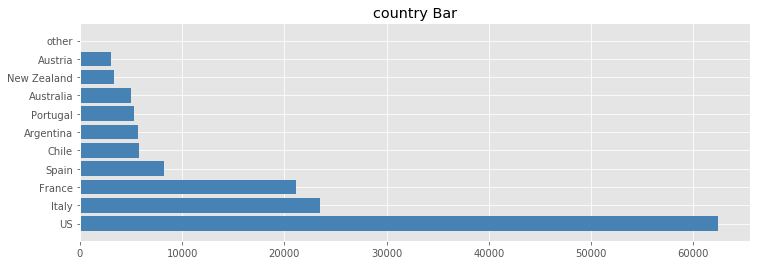

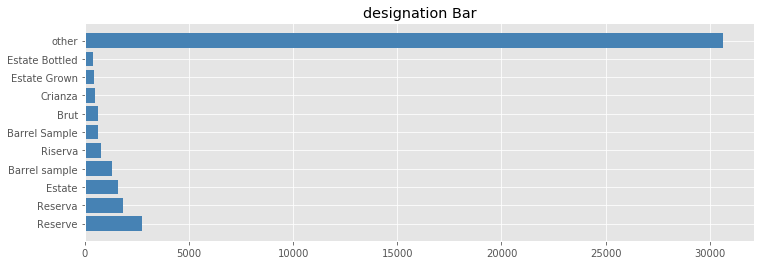

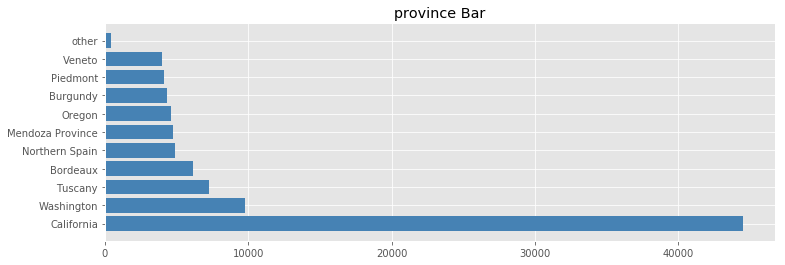

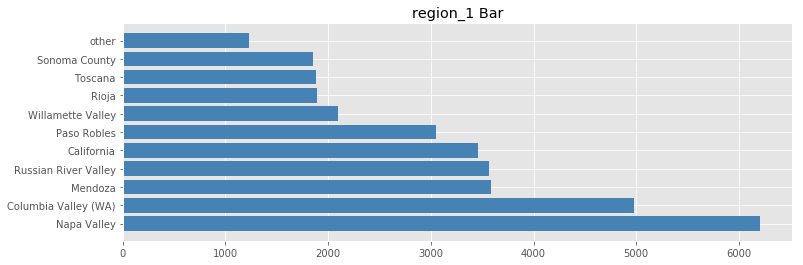

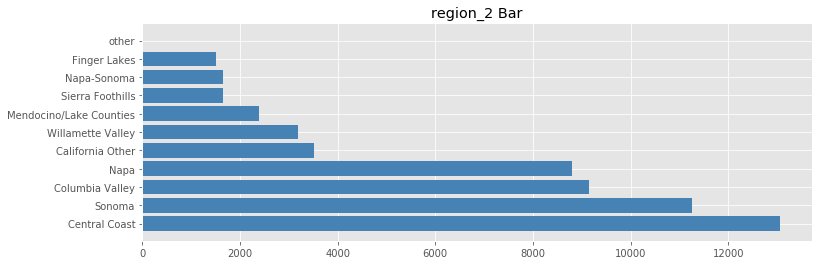

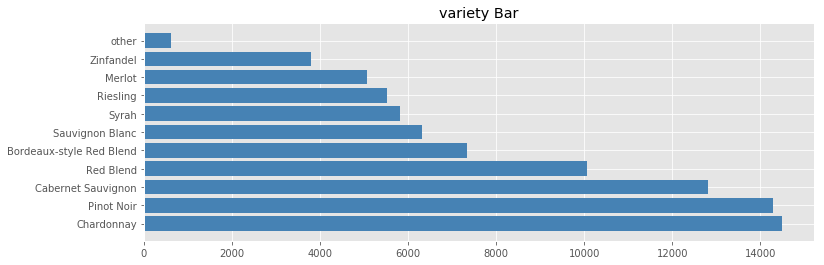

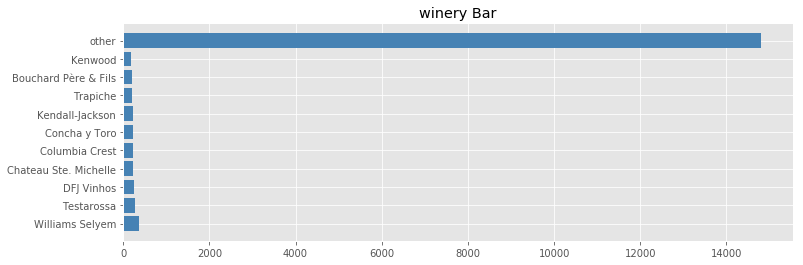

In [6]:
##数据可视化
#绘制标称属性条形图
for fea in features_n:
    plt.figure(figsize=(12,4))
    plt.style.use('ggplot')
    fea_c = data[fea].value_counts()
    count = 0
    sum = 0
    show = {}
    for it in fea_c.index:
        count += 1
        if count <= 10:
            show[it] = fea_c[it]
        else:
            sum += 1
    show['other'] = sum
    plt.title(fea+' Bar')
    plt.barh(y = range(11), width = list(show.values()), tick_label = list(show.keys()), 
             color = 'steelblue',height = 0.8 )

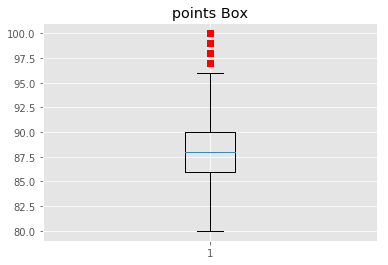

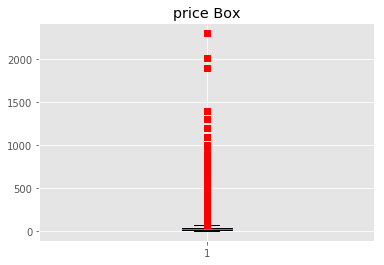

In [7]:
##数据可视化
#绘制数值属性盒图
for fea in features: 
    fig = plt.figure(figsize=(6,4))
    plt.boxplot(np.array(data[fea].dropna(axis=0)),
                notch=False, sym='rs', vert=True)  
    plt.title(fea+' Box')
    plt.show()

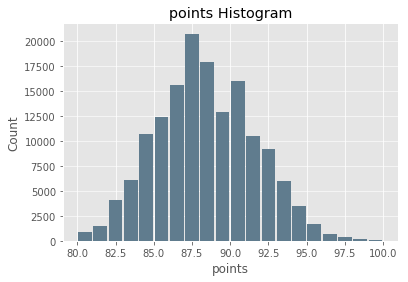

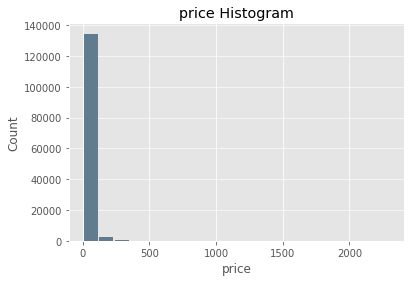

In [8]:
##数据可视化
#绘制数值属性直方图
for fea in features: 
    fig = plt.figure(figsize=(6,4))
    tmp = data[fea].dropna(axis=0)
    tmp.plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
    plt.title(fea+' Histogram')
    plt.xlabel(fea)
    plt.ylabel('Count')
    plt.grid(axis='y', alpha=0.75)

In [9]:
##查看有缺失值的特征
data.isnull().any()  
##country;designation;price;province;region_1;region_2含有缺失值

Unnamed: 0     False
country         True
description    False
designation     True
points         False
price           True
province        True
region_1        True
region_2        True
variety        False
winery         False
dtype: bool

In [10]:
#对每个含有缺失值的属性进行查看和分析
#1.country & province
print("country和province属性缺失个数："+str(len(data[data.country.isnull()])))
data[data.country.isnull()] ##查看缺失数据
#分析：这五条记录同时缺失country和province属性值，通过观察发现，
#可看出这些样本的region_1、region_2属性均缺失，缺失原因可能是未知葡萄酒酒的生产地

country和province属性缺失个数：5


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
1133,1133,NaN,Delicate white flowers and a spin of lemon pee...,Askitikos,90,17.0,NaN,NaN,NaN,Assyrtiko,Tsililis
1440,1440,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Red Blend,Büyülübağ
68226,68226,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas
113016,113016,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas
135696,135696,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas


In [11]:
#2.designation
print("designation属性缺失个数："+str(len(data[data.designation.isnull()])))
data[data.designation.isnull()][0:3] ##查看3条缺失数据
##分析：该特征为葡萄园名字，该字段缺失可能是因为未知葡萄来源

designation属性缺失个数：45735


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
36,36,France,Gingery spice notes accent fresh pear and melo...,NaN,90,60.0,Rhône Valley,Châteauneuf-du-Pape,NaN,Rhône-style White Blend,Clos de L'Oratoire des Papes
37,37,Italy,"Aromas of forest floor, violet, red berry and ...",NaN,90,29.0,Tuscany,Vino Nobile di Montepulciano,NaN,Sangiovese,Avignonesi
38,38,Italy,"This has a charming nose that boasts rose, vio...",NaN,90,23.0,Tuscany,Chianti Classico,NaN,Sangiovese,Casina di Cornia


In [12]:
#3.price
print("price属性缺失个数："+str(len(data[data.price.isnull()])))
data[data.price.isnull()][0:3] ##查看前3条缺失数据
##分析：该特征为葡萄酒价格，该字段缺失可能是因为价格未知

price属性缺失个数：13695


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
32,32,Italy,"Underbrush, scorched earth, menthol and plum s...",Vigna Piaggia,90,NaN,Tuscany,Brunello di Montalcino,NaN,Sangiovese,Abbadia Ardenga
56,56,France,"Delicious while also young and textured, this ...",Le Pavé,90,NaN,Loire Valley,Sancerre,NaN,Sauvignon Blanc,Domaine Vacheron
72,72,Italy,"This offers aromas of red rose, wild berry, da...",Bussia Riserva,91,NaN,Piedmont,Barolo,NaN,Nebbiolo,Silvano Bolmida


In [13]:
#4.region_1
print("region_1属性缺失个数："+str(len(data[data.region_1.isnull()])))
data[data.region_1.isnull()][0:3] ##查看前3条缺失数据
#分析：该特征为葡萄酒的产区，该字段缺失可能是因为产区未知，
#并且region_1缺失的样本region_2也会缺失。

region_1属性缺失个数：25060


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
25,25,New Zealand,"Yields were down in 2015, but intensity is up,...",Maté's Vineyard,94,57.0,Kumeu,NaN,NaN,Chardonnay,Kumeu River
30,30,Bulgaria,This Bulgarian Mavrud presents the nose with s...,Bergulé,90,15.0,Bulgaria,NaN,NaN,Mavrud,Villa Melnik
42,42,US,This is an aromatic brooder with aromas of sco...,Private Reserve,90,55.0,Idaho,NaN,NaN,Petite Sirah,Huston


In [14]:
#5.region_2
print("region_2属性缺失个数："+str(len(data[data.region_2.isnull()])))
data[data.region_2.isnull()][0:3] ##查看前3条缺失数据
##分析：该特征为葡萄酒的具体产区，大部分数据的该字段缺失。

region_2属性缺失个数：89977


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
5,5,Spain,"Deep, dense and pure from the opening bell, th...",Numanthia,95,73.0,Northern Spain,Toro,NaN,Tinta de Toro,Numanthia


In [15]:
##缺失值处理方法一：将缺失部分剔除
data1 = data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
print('处理后数据行数:'+str(data1.shape[0]))
##分析：可以看出剔除有缺失值的样本后，大部分样本都会被剔除，所以这种处理方法不理想。

处理后数据行数:39241


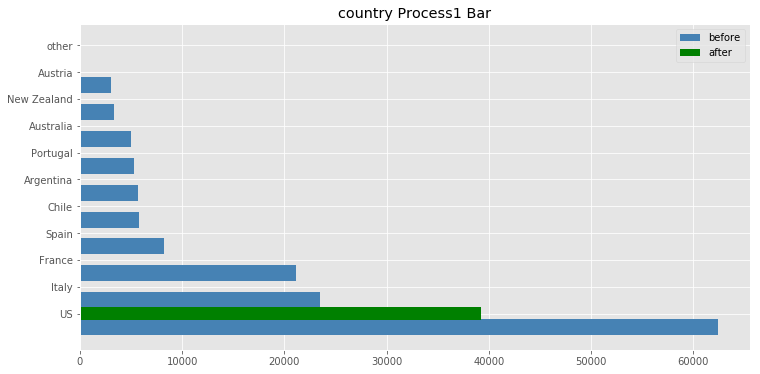

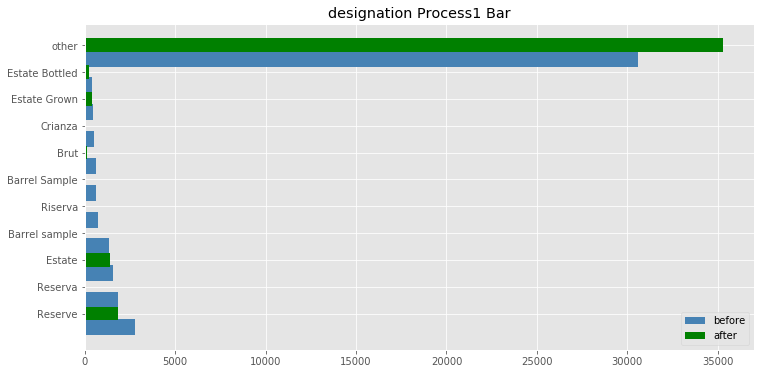

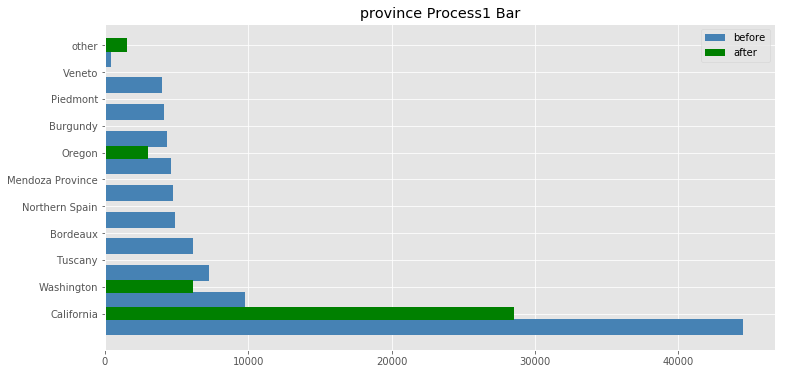

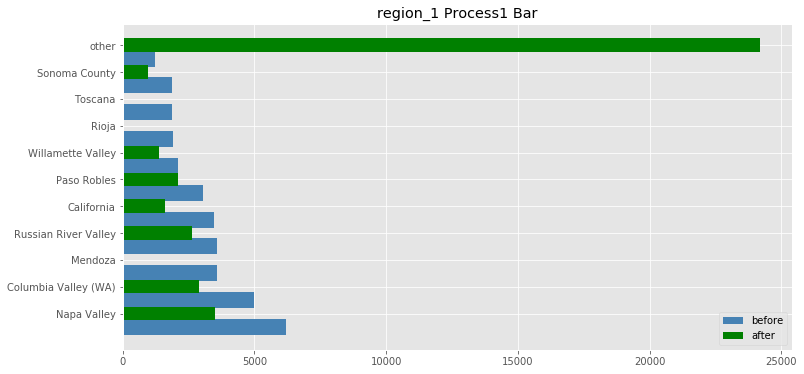

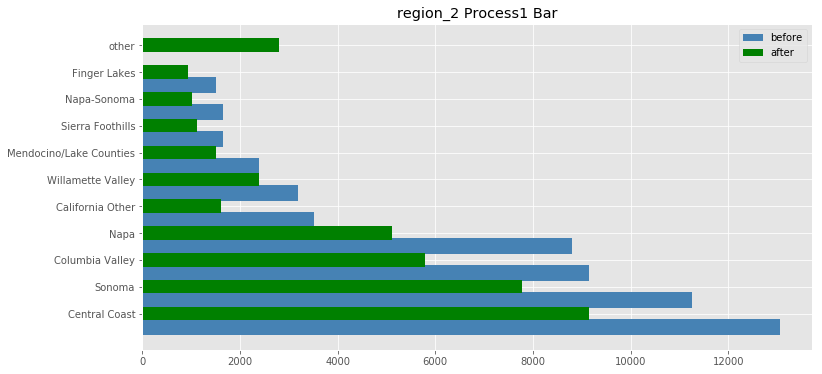

In [16]:
##缺失值处理方法一：将缺失部分剔除
#绘制对比图 
features_lost = ['country','designation','province','region_1','region_2']
for fea in features_lost:
    plt.figure(figsize=(12,6))
    plt.style.use('ggplot')
    fea_c = data[fea].value_counts()
    count = 0
    sum = 0
    show = {}
    for it in fea_c.index:
        count += 1
        if count <= 10:
            show[it] = fea_c[it]
        else:
            sum += 1
    show['other'] = sum
    plt.title(fea+' Process1 Bar')
    bar_1 = list(range(11))
    bar_2 = [i+0.5 for i in bar_1]
    plt.yticks(list(show.values()), list(show.keys()))
    plt.barh(y = bar_1,width = list(show.values()),tick_label = list(show.keys()), 
             color = 'steelblue', height = 0.6,label = 'before')
    fea_c1 = data1[fea].value_counts()
    show1 = {}
    for it in show.keys():
        if it in fea_c1.index:
            show1[it] = fea_c1[it]
        else:
            show1[it] = 0
    sum = 0;
    for it in fea_c1.index:
        if it not in show.keys():
            sum += fea_c1[it];
    show1['other'] = sum
    plt.barh(y = bar_2,width = list(show1.values()), tick_label = list(show1.keys()),
             color = 'green',height = 0.5 ,label = 'after')
    plt.legend()
    plt.width = list(show.values())
    plt.show()

In [17]:
##缺失值处理方法二：使用最高频率值填补缺失值
lost_features = ['country','designation','price','province','region_1','region_2']
fill_dict = {}
print("获取每个属性频率最高的值进行填补:")
for fea in lost_features: 
    fea_value = data[fea].value_counts()
    fill_dict[fea] = fea_value.head(1).keys()[0]
print(fill_dict)
data2 = data.fillna(fill_dict)

获取每个属性频率最高的值进行填补:
{'country': 'US', 'designation': 'Reserve', 'price': 20.0, 'province': 'California', 'region_1': 'Napa Valley', 'region_2': 'Central Coast'}


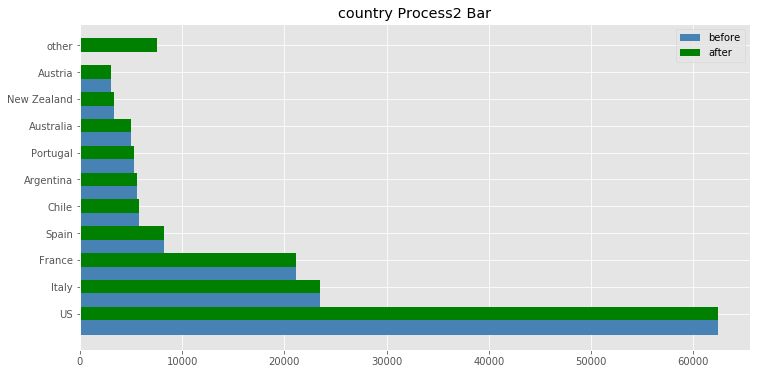

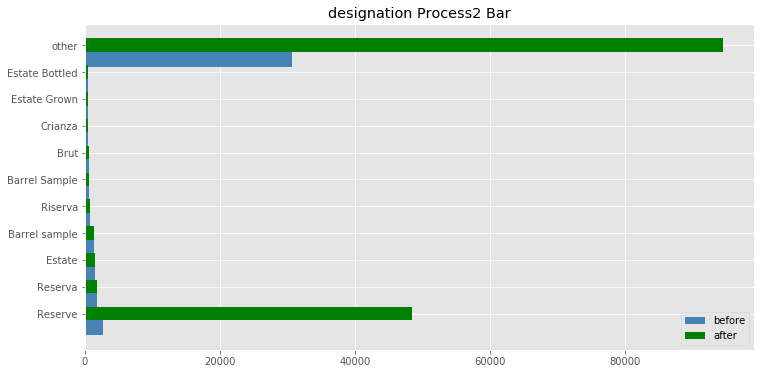

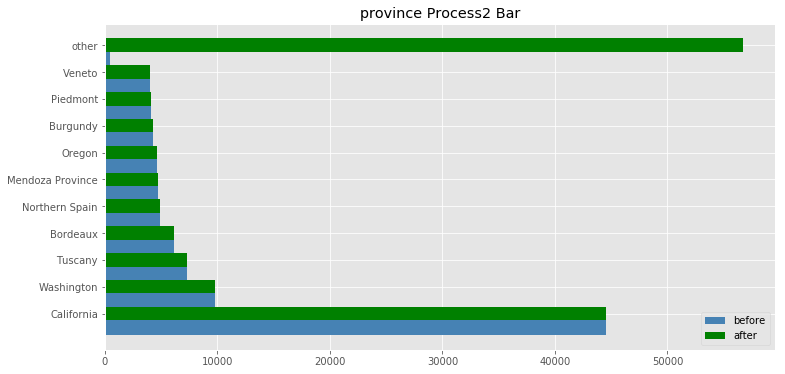

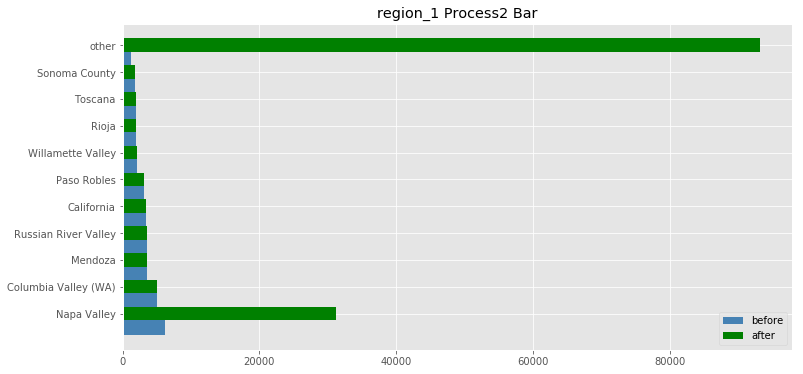

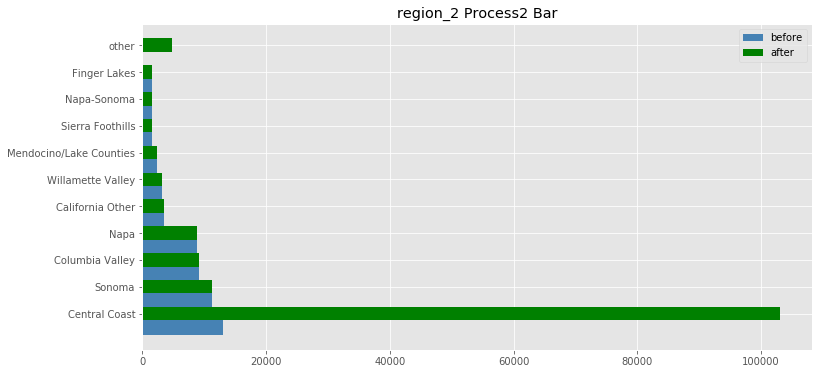

In [18]:
##缺失值处理方法二：使用最高频率值填补缺失值
#绘制对比图 
features_lost = ['country','designation','province','region_1','region_2']
for fea in features_lost:
    plt.figure(figsize=(12,6))
    plt.style.use('ggplot')
    fea_c = data[fea].value_counts()
    count = 0
    sum = 0
    show = {}
    for it in fea_c.index:
        count += 1
        if count <= 10:
            show[it] = fea_c[it]
        else:
            sum += 1
    show['other'] = sum
    plt.title(fea+' Process2 Bar')
    bar_1 = list(range(11))
    bar_2 = [i+0.5 for i in bar_1]
    plt.yticks(list(show.values()), list(show.keys()))
    plt.barh(y = bar_1,width = list(show.values()),tick_label = list(show.keys()),
             color = 'steelblue',height = 0.6 ,label = 'before')
    fea_c1 = data2[fea].value_counts()
    show1 = {}
    for it in show.keys():
        if it in fea_c1.index:
            show1[it] = fea_c1[it]
        else:
            show1[it] = 0
    sum = 0;
    for it in fea_c1.index:
        if it not in show.keys():
            sum += fea_c1[it];
    show1['other'] = sum
    plt.barh(y = bar_2,width = list(show1.values()),tick_label = list(show.keys()),
             color = 'green',height = 0.5 ,label = 'after')
    plt.legend()
    plt.width = list(show.values())
    plt.show()